<a href="https://colab.research.google.com/github/amandaventurac/petr4_oil_price_correlation/blob/main/crude_oil_and_petr4_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Petrobras is a state-owned Brazilian multinational corporation in the petroleum industry.  

Here the main goal is to answer the following question:

**"How strong is the correlation between the crude oil price per Barrel and the PETR4 stock prices?"**

The first hypothesis is that the PETR4 stock prices would be strongly correlated to the oil price per Barrel. The Pearson correlation can be used to investigate it. 

 The Pearson correlation is a way to infer if two numerical variables are correlated or not:

* If the correlation is close to -1, then the PETR4 would decrease if the crude oil price increases.
* If the correlation is close to 0, then PETR4 is not correlated with the crude oil price.
* If the correlation is close to 1, then the PETR4 would increase if the crude oil price increases.
    * If correlation> 0.8, then it is a very strong correlation.

    * If 0.6 =< correlation <0.8 it is a strong correlation



The yahooquery python library will be used to collect the PETR4 stock price data.

The crude oil price per barrel was obtained here: https://www.eia.gov/dnav/pet/hist/LeafHandler.ashx?n=pet&s=f000000__3&f=m 

In [51]:
pip install yahooquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
#importing yahooquery
from yahooquery import Ticker

In [53]:
#choosing the correct ticker related to PETRS4
petr = Ticker("PETR4.SA")
df_petr= petr.history(period="max")

In [54]:
df_petr

open       high        low      close        volume  \
symbol   date                                                                   
PETR4.SA 2000-01-03   5.875000   5.875000   5.875000   5.875000  3.538944e+10   
         2000-01-04   5.550000   5.550000   5.550000   5.550000  2.886144e+10   
         2000-01-05   5.494000   5.494000   5.494000   5.494000  4.303360e+10   
         2000-01-06   5.475000   5.475000   5.475000   5.475000  3.405568e+10   
         2000-01-07   5.500000   5.500000   5.500000   5.500000  2.091264e+10   
...                        ...        ...        ...        ...           ...   
         2023-06-02  27.430000  27.600000  27.110001  27.180000  3.991930e+07   
         2023-06-05  27.540001  27.559999  27.230000  27.469999  3.932170e+07   
         2023-06-06  27.450001  28.250000  27.209999  28.049999  7.542660e+07   
         2023-06-07  28.650000  29.059999  28.430000  28.870001  8.233040e+07   
         2023-06-09  29.100000  30.389999  29.020000  30.280001  7.943760e+07   

                      adjclose  dividends  splits  
symbol   date                                      
PETR4.SA 2000-01-03   1.666141        0.0     0.0  
         2000-01-04   1.573971        0.0     0.0  
         2000-01-05   1.558090        0.0     0.0  
         2000-01-06   1.552701        0.0     0.0  
         2000-01-07   1.559791        0.0     0.0  
...                        ...        ...     ...  
         2023-06-02  27.180000        0.0     0.0  
         2023-06-05  27.469999        0.0     0.0  
         2023-06-06  28.049999        0.0     0.0  
         2023-06-07  28.870001        0.0     0.0  
         2023-06-09  30.280001        0.0     0.0  

[5887 rows x 8 columns]

The PETR4 data is shown in days.

In [55]:
#importing pandas module

import pandas as pd

In [56]:
# importing the downloaded data of crude oil barrel price, we should skip 4 lines of comments before data appearance
oil_dataset = pd.read_csv('/content/U.S._Crude_Oil_First_Purchase_Price.csv', skiprows=4)


In [57]:
oil_dataset

,Month,U.S. Crude Oil First Purchase Price Dollars per Barrel
0,Mar 2023,72.09
1,Feb 2023,74.32
2,Jan 2023,75.71
3,Dec 2022,76.45
4,Nov 2022,84.43
...,...,...
586,May 1974,6.87
587,Apr 1974,6.77
588,Mar 1974,6.77
589,Feb 1974,6.87


The crude oil barrel price is shown in months. To compare data with different granularities, the PETR4 dataset should be converted to a monthly aggregate. One way to do this task is to get the average PETR4 price per month, another way is to get the median PETR4 price per month. Alternatively, if we do not see any correlation between PETR4 and the oil prices, we can investigate if the maximum PETR4 price per month is correlated with the crude oil barrel price.

In [58]:
df_petr_month_price = pd.DataFrame(columns = ('index', 'month'))

In [59]:
df_petr_month_price['index'] = list(df_petr.index)[:-1]

In [60]:
#creating a function taht gets the year and the month from data
def get_year_month(string):
  year = string.split('-')[0]
  month = string.split('-')[1]
  return year+'-'+month

In [61]:
 df_petr_month_price['month'] = df_petr_month_price['index'].apply(lambda x: get_year_month(str(x[1])))

In [62]:
#get only month and closed data form petr4:
df_petr_month_price['price'] = list(df_petr['close'].values)[:-1]

In [63]:
 df_petr_month_price

,index,month,price
0,"(PETR4.SA, 2000-01-03)",2000-01,5.875000
1,"(PETR4.SA, 2000-01-04)",2000-01,5.550000
2,"(PETR4.SA, 2000-01-05)",2000-01,5.494000
3,"(PETR4.SA, 2000-01-06)",2000-01,5.475000
4,"(PETR4.SA, 2000-01-07)",2000-01,5.500000
...,...,...,...
5881,"(PETR4.SA, 2023-06-01)",2023-06,26.959999
5882,"(PETR4.SA, 2023-06-02)",2023-06,27.180000
5883,"(PETR4.SA, 2023-06-05)",2023-06,27.469999
5884,"(PETR4.SA, 2023-06-06)",2023-06,28.049999


In [64]:
#creating the petr4 median per month, as a dictionary from groupby method
# truncate data to month 
median_dict = df_petr_month_price['price'].groupby( df_petr_month_price['month']).median()

In [65]:
#creating the petr4 average per month dataset  as a dictionary from groupby method
mean_dict = df_petr_month_price['price'].groupby( df_petr_month_price['month']).mean()

In [66]:
#creating the petr4 maximum per month dataset  as a dictionary from groupby method
max_dict = df_petr_month_price['price'].groupby( df_petr_month_price['month']).max()

In [67]:
#joining all columns on the same dataset
petr4_summarized = pd.DataFrame(columns = ['month', 'mean', 'median', 'maximum'])
petr4_summarized.month = median_dict.keys()
petr4_summarized['mean'] = petr4_summarized.month.apply(lambda x: mean_dict.get(x))
petr4_summarized['median'] = petr4_summarized.month.apply(lambda x: median_dict.get(x))
petr4_summarized['maximum'] = petr4_summarized.month.apply(lambda x: max_dict.get(x))

In [68]:
petr4_summarized

,month,mean,median,maximum
0,2000-01,5.369381,5.338000,5.875000
1,2000-02,5.549667,5.563000,5.863000
2,2000-03,5.964174,5.900000,6.399000
3,2000-04,5.618900,5.634500,6.188000
4,2000-05,5.392174,5.400000,5.575000
...,...,...,...,...
277,2023-02,26.013889,25.990000,26.850000
278,2023-03,24.078696,23.760000,25.959999
279,2023-04,25.755556,26.065001,27.389999
280,2023-05,25.359091,25.715000,26.799999


In [69]:
import numpy as np

That's important to ensure the data from petr4 and oil prices are shown in the same months.

The monthly information is displayed differently in the oil dataset.  The following function should convert  dathe ta to the 'yyyy-mm' format:

In [70]:
def date_conversion(string) :
  months_str = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
  months_int =  ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
  dict_month = dict(zip(months_str,months_int))
  data_month = string.split()[0]
  data_month_int = dict_month.get(data_month)
  data_final = string.split()[1]+'-'+data_month_int
  return   data_final 

In [71]:
oil_dataset['month'] = oil_dataset['Month'].apply(lambda x: date_conversion(x)) 

In [72]:
oil_dataset

,Month,U.S. Crude Oil First Purchase Price Dollars per Barrel,month
0,Mar 2023,72.09,2023-03
1,Feb 2023,74.32,2023-02
2,Jan 2023,75.71,2023-01
3,Dec 2022,76.45,2022-12
4,Nov 2022,84.43,2022-11
...,...,...,...
586,May 1974,6.87,1974-05
587,Apr 1974,6.77,1974-04
588,Mar 1974,6.77,1974-03
589,Feb 1974,6.87,1974-02


In [73]:
#subsetting the petr4 and the oil price data, from january 2000  to  may 2023, june dataset is not complete
petr4_summarized = petr4_summarized[petr4_summarized['month'] != '2023-06'].copy()

It is important to ensure that both datasets have the same months. Both datasets will be joined using the month column as the key:

In [74]:
df_petr_oil = pd.merge(petr4_summarized, oil_dataset, how= 'inner', on = 'month')

In [75]:
df_petr_oil.set_index('month', inplace  = True)

In [76]:
df_petr_oil.rename(columns = {'U.S. Crude Oil First Purchase Price Dollars per Barrel':'oil price per Barrel'}, inplace= True)

In [77]:
df_petr_oil.rename(columns = {'mean':'petr4 mean', 'median':'petr4 median', 'maximum': 'petr4 maximum' }, inplace =  True)

In [78]:
df_petr_oil

,petr4 mean,petr4 median,petr4 maximum,Month,oil price per Barrel
month,,,,,
2000-01,5.369381,5.338000,5.875000,Jan 2000,23.53
2000-02,5.549667,5.563000,5.863000,Feb 2000,25.48
2000-03,5.964174,5.900000,6.399000,Mar 2000,26.19
2000-04,5.618900,5.634500,6.188000,Apr 2000,23.20
2000-05,5.392174,5.400000,5.575000,May 2000,25.58
...,...,...,...,...,...
2022-11,26.469500,26.840000,29.950001,Nov 2022,84.43
2022-12,24.184286,24.709999,25.910000,Dec 2022,76.45
2023-01,24.921818,24.849999,26.940001,Jan 2023,75.71


In [79]:
#ploting data, the different types of petr4 aggregation function are displayed in different colors.

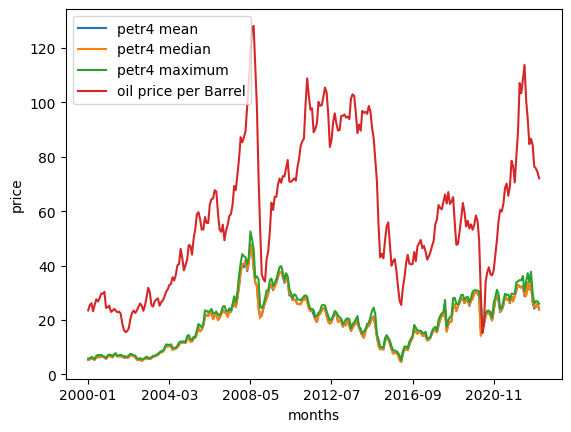

In [93]:
import matplotlib.pyplot as plt
df_petr_oil['petr4 mean'].plot()
df_petr_oil['petr4 median'].plot()
df_petr_oil['petr4 maximum'].plot()
df_petr_oil['oil price per Barrel'].plot()
plt.xlabel('months')
plt.ylabel('price')
plt.legend()


We can see a correlation between the petr4 and the oil price per Barrel, but the y scales present a large difference. To improve the visualization, the normalization can be applied.

In [81]:
def normalize_column(data, min_column, max_column):
  return ((data- min_column)/(max_column - min_column))

In [82]:
min_petr4_maximum = min(df_petr_oil['petr4 maximum'])
max_petr4_maximum = max(df_petr_oil['petr4 maximum'])
df_petr_oil['petr4 maximum_norm'] = df_petr_oil['petr4 maximum'].apply(lambda x: normalize_column(x, min_petr4_maximum, max_petr4_maximum))

In [83]:
min_petr4_mean = min(df_petr_oil['petr4 mean'])
max_petr4_mean = max(df_petr_oil['petr4 mean'])
df_petr_oil['petr4 mean_norm'] = df_petr_oil['petr4 mean'].apply(lambda x: normalize_column(x, min_petr4_mean, max_petr4_mean))

In [84]:
min_petr4_median = min(df_petr_oil['petr4 median'])
max_petr4_median = max(df_petr_oil['petr4 median'])
df_petr_oil['petr4 median_norm'] = df_petr_oil['petr4 median'].apply(lambda x: normalize_column(x, min_petr4_median, max_petr4_median))

In [85]:
min_oil_price_per_Barrel = min(df_petr_oil['oil price per Barrel'])
max_oil_price_per_Barrel = max(df_petr_oil['oil price per Barrel'])
df_petr_oil['oil price per Barrel_norm'] = df_petr_oil['oil price per Barrel'].apply(lambda x: normalize_column(x, min_oil_price_per_Barrel, max_oil_price_per_Barrel))

In [86]:
df_petr_oil

,petr4 mean,petr4 median,petr4 maximum,Month,oil price per Barrel,petr4 maximum_norm,petr4 mean_norm,petr4 median_norm,oil price per Barrel_norm
month,,,,,,,,,
2000-01,5.369381,5.338000,5.875000,Jan 2000,23.53,0.015516,0.016772,0.017379,0.073959
2000-02,5.549667,5.563000,5.863000,Feb 2000,25.48,0.015263,0.020942,0.022607,0.091231
2000-03,5.964174,5.900000,6.399000,Mar 2000,26.19,0.026578,0.030529,0.030437,0.097520
2000-04,5.618900,5.634500,6.188000,Apr 2000,23.20,0.022124,0.022543,0.024268,0.071036
2000-05,5.392174,5.400000,5.575000,May 2000,25.58,0.009183,0.017299,0.018820,0.092117
...,...,...,...,...,...,...,...,...,...
2022-11,26.469500,26.840000,29.950001,Nov 2022,84.43,0.523749,0.504791,0.516961,0.613375
2022-12,24.184286,24.709999,25.910000,Dec 2022,76.45,0.438463,0.451937,0.467472,0.542693
2023-01,24.921818,24.849999,26.940001,Jan 2023,75.71,0.460207,0.468995,0.470725,0.536138


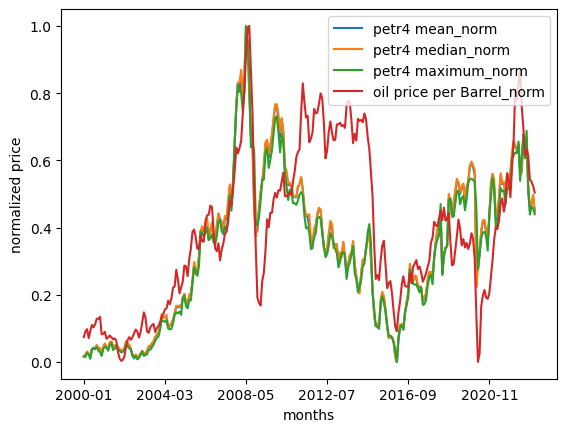

In [87]:
df_petr_oil['petr4 mean_norm'].plot()
df_petr_oil['petr4 median_norm'].plot()
df_petr_oil['petr4 maximum_norm'].plot()
df_petr_oil['oil price per Barrel_norm'].plot()
plt.xlabel('months')
plt.ylabel('normalized price')
plt.legend()

The lineplot above shows the correlation between the PETR4 stock prices and the oil price per Barrel.  The maximum value was observed in the same month for both. The rising trend on the left part also shows a good correlation between the four curves. Another way to measure the correlation between two numerical variables is to calculate the Pearson correlation. 

In [88]:
df_pearson_correlation = pd.DataFrame(index = ['oil price per Barrel'])

In [89]:
df_pearson_correlation['petr4 mean_norm'] = np.corrcoef(df_petr_oil['petr4 mean_norm'],df_petr_oil['oil price per Barrel_norm'])[0][1]

In [90]:
df_pearson_correlation['petr4 median_norm'] = np.corrcoef(df_petr_oil['petr4 median_norm'],df_petr_oil['oil price per Barrel_norm'])[0][1]

In [91]:
df_pearson_correlation['petr4 maximum_norm'] = np.corrcoef(df_petr_oil['petr4 maximum_norm'],df_petr_oil['oil price per Barrel_norm'])[0][1]

In [92]:
df_pearson_correlation

,petr4 mean_norm,petr4 median_norm,petr4 maximum_norm
oil price per Barrel,0.702039,0.700355,0.703575


The table above shows the correlation between the oil price per Barrel and the mean, median and maximum of PETR4 stock prices. The correlation close to **0.7 indicates a strong positive correlation** from January 2000 to May 2023.


## Conclusion:
The Pearson correlation between the PETR4 stock price and the oil price per Barrel is a strong positive correlation from January 2000 to May 2023, not  a very strong correlation as one would expect (above 0.8).

From Dec 2008 to Jul 2012 the PETR4 stock price  constantly decreased, while the oil price per Barrel did not show this trend.
